# Facemesh Data loader
This script demonstrates how to use the FacemeshDataLoader and facial clusters
for targeted movement analysis. Copy and paste sections into Jupyter notebook cells.

## Setup and Imports

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("✓ Standard libraries imported")

✓ Standard libraries imported


## Import Custom Modules

In [2]:
# Import our custom classes
from data_loader_template import FacemeshDataLoader
from facial_clusters import (
    FACIAL_CLUSTERS, CLUSTER_GROUPS, EXPRESSION_CLUSTERS,
    get_cluster_indices, get_group_indices, 
    get_all_cluster_names, get_all_group_names
)

print("✓ Custom modules imported successfully")
print(f"Available facial clusters: {len(FACIAL_CLUSTERS)}")
print(f"Available cluster groups: {len(CLUSTER_GROUPS)}")
print(f"Available expression clusters: {len(EXPRESSION_CLUSTERS)}")

✓ Custom modules imported successfully
Available facial clusters: 32
Available cluster groups: 7
Available expression clusters: 6


## Initialize Data Loader

In [3]:
# Initialize data loader with 5-frame rolling baseline
loader = FacemeshDataLoader(window_size=5)

print(f"Data root: {loader.data_root}")
print(f"Window size: {loader.window_size}")
print(f"File suffix: {loader.suffix}")


Found data directory at: c:\Users\ktrua\source\repos\facemesh-rb\training\scripts\..\..\read
Data root: ..\..\read
Window size: 5
File suffix: -rb5


## Explore Available Data

In [4]:
# Explore available subjects
available_subjects = []
for subject_dir in loader.data_root.iterdir():
    if subject_dir.is_dir() and subject_dir.name.startswith('e'):
        available_subjects.append(subject_dir.name)

available_subjects.sort(key=lambda x: int(x[1:]))  # Sort numerically
print(f"Available subjects ({len(available_subjects)}): {available_subjects[:10]}...")  # Show first 10


Available subjects (19): ['e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e17', 'e18', 'e19', 'e20']...


## Load Sample Data

In [5]:
# Load data for first subject - baseline session
sample_subject = available_subjects[0]
print(f"Loading baseline data for subject: {sample_subject}")

df_baseline = loader.load_subject_data(sample_subject, 'baseline')
print(f"Loaded {len(df_baseline)} rows, {len(df_baseline.columns)} columns")

if not df_baseline.empty:
    print(f"\nTime range: {df_baseline['Time (s)'].min():.2f} - {df_baseline['Time (s)'].max():.2f} seconds")
    print(f"Duration: {df_baseline['Time (s)'].max() - df_baseline['Time (s)'].min():.2f} seconds")
    
    # Show column types
    print("\nColumn types:")
    base_cols = [col for col in df_baseline.columns if col.startswith('feat_') and not ('_rb' in col)]
    rb_cols = [col for col in df_baseline.columns if '_rb5' in col and not col.endswith('_diff')]
    diff_cols = [col for col in df_baseline.columns if col.endswith('_rb5_diff')]
    meta_cols = [col for col in df_baseline.columns if not col.startswith('feat_')]
    
    print(f"  Base coordinate features: {len(base_cols)}")
    print(f"  Rolling baseline features: {len(rb_cols)}")
    print(f"  Baseline deviation features: {len(diff_cols)}")
    print(f"  Metadata columns: {len(meta_cols)}")

Loading baseline data for subject: e1
Loaded 53 rows, 4307 columns

Time range: 0.00 - 52.00 seconds
Duration: 52.00 seconds

Column types:
  Base coordinate features: 1434
  Rolling baseline features: 1434
  Baseline deviation features: 1434
  Metadata columns: 5


## Display Sample Data

In [6]:
# Display sample of the data
if not df_baseline.empty:
    print("Sample metadata columns:")
    metadata_cols = ['Subject Name', 'Test Name', 'Time (s)']
    available_meta = [col for col in metadata_cols if col in df_baseline.columns]
    print(df_baseline[available_meta].head())
    
    print("\nSample coordinate features (first 5):")
    coord_cols = [col for col in df_baseline.columns if col.startswith('feat_')][:5]
    print(df_baseline[coord_cols].head())


Sample metadata columns:
  Subject Name Test Name  Time (s)
0           e1  baseline         0
1           e1  baseline         1
2           e1  baseline         2
3           e1  baseline         3
4           e1  baseline         4

Sample coordinate features (first 5):
     feat_0_x    feat_0_y  feat_0_z    feat_1_x    feat_1_y
0  258.698788  387.840843 -0.438130  257.914410  357.505150
1  262.916908  398.097610 -0.392441  261.922789  370.010834
2  259.341316  395.884056 -0.433234  258.173847  365.934601
3  259.208393  395.542183 -0.411885  257.953863  366.277428
4  256.774778  375.073776 -0.510844  256.067848  344.124641


## Explore Facial Clusters

In [7]:
# Display all available clusters
print("Individual Facial Clusters:")
for cluster_name in get_all_cluster_names():
    indices = get_cluster_indices(cluster_name)
    print(f"  {cluster_name}: {len(indices)} landmarks")

print("\nCluster Groups:")
for group_name in get_all_group_names():
    indices = get_group_indices(group_name)
    clusters = CLUSTER_GROUPS[group_name]
    print(f"  {group_name}: {len(indices)} landmarks across {len(clusters)} clusters")
    print(f"    Includes: {', '.join(clusters)}")

print("\nExpression-Specific Clusters:")
for expression, groups in EXPRESSION_CLUSTERS.items():
    total_landmarks = sum(len(get_group_indices(group)) for group in groups)
    print(f"  {expression}: {total_landmarks} landmarks across {', '.join(groups)}")

Individual Facial Clusters:
  silhouette: 36 landmarks
  lipsUpperOuter: 11 landmarks
  lipsLowerOuter: 10 landmarks
  lipsUpperInner: 11 landmarks
  lipsLowerInner: 11 landmarks
  rightEyeUpper0: 7 landmarks
  rightEyeLower0: 9 landmarks
  rightEyeUpper1: 7 landmarks
  rightEyeLower1: 9 landmarks
  rightEyeUpper2: 7 landmarks
  rightEyeLower2: 9 landmarks
  rightEyeLower3: 9 landmarks
  rightEyeIris: 5 landmarks
  rightEyebrowUpper: 8 landmarks
  rightEyebrowLower: 6 landmarks
  leftEyeUpper0: 7 landmarks
  leftEyeLower0: 9 landmarks
  leftEyeUpper1: 7 landmarks
  leftEyeLower1: 9 landmarks
  leftEyeUpper2: 7 landmarks
  leftEyeLower2: 9 landmarks
  leftEyeLower3: 9 landmarks
  leftEyeIris: 5 landmarks
  leftEyebrowUpper: 8 landmarks
  leftEyebrowLower: 6 landmarks
  midwayBetweenEyes: 1 landmarks
  noseTip: 1 landmarks
  noseBottom: 1 landmarks
  noseRightCorner: 1 landmarks
  noseLeftCorner: 1 landmarks
  rightCheek: 1 landmarks
  leftCheek: 1 landmarks

Cluster Groups:
  mouth: 41 

## Define Helper Functions

### Feature extraction from csv

In [8]:
def get_cluster_features(df, cluster_name, feature_types=['rb', 'diff']):
    """
    Extract features for specific facial landmarks in a cluster.
    
    Args:
        df: DataFrame with facemesh data
        cluster_name: Name of facial cluster
        feature_types: Types of features to extract
    
    Returns:
        DataFrame with cluster-specific features
    """
    # Get landmark indices for this cluster
    landmark_indices = get_cluster_indices(cluster_name)
    
    selected_cols = []
    
    # Always include metadata
    metadata_cols = ['Subject Name', 'Test Name', 'Time (s)', 'Session']
    selected_cols.extend([col for col in metadata_cols if col in df.columns])
    
    # Select features for landmarks in this cluster
    for landmark_idx in landmark_indices:
        for feature_type in feature_types:
            if feature_type == 'base':
                # Original x, y, z coordinates
                for axis in ['x', 'y', 'z']:
                    col_name = f'feat_{landmark_idx}_{axis}'
                    if col_name in df.columns:
                        selected_cols.append(col_name)
            
            elif feature_type == 'rb':
                # Rolling baseline averages
                for axis in ['x', 'y', 'z']:
                    col_name = f'feat_{landmark_idx}_{axis}_rb{loader.window_size}'
                    if col_name in df.columns:
                        selected_cols.append(col_name)
            
            elif feature_type == 'diff':
                # Baseline deviations
                for axis in ['x', 'y', 'z']:
                    col_name = f'feat_{landmark_idx}_{axis}_rb{loader.window_size}_diff'
                    if col_name in df.columns:
                        selected_cols.append(col_name)
    
    return df[selected_cols]

### Euclidian distance function
#### (Magnatude form rolling baseline)

In [9]:
def analyze_region_movement(df, region_name, feature_type='diff'):
    """
    Analyze movement patterns for a specific facial region.
    """
    if region_name in CLUSTER_GROUPS:
        # It's a cluster group (e.g., 'mouth', 'eyes')
        landmark_indices = get_group_indices(region_name)
        title = f"{region_name.title()} Region Movement"
    else:
        # It's an individual cluster
        landmark_indices = get_cluster_indices(region_name)
        title = f"{region_name.title()} Movement"
    
    if not landmark_indices:
        print(f"No landmarks found for region: {region_name}")
        return None, None
    
    # Collect relevant features
    feature_cols = []
    for landmark_idx in landmark_indices:
        for axis in ['x', 'y', 'z']:
            if feature_type == 'diff':
                col_name = f'feat_{landmark_idx}_{axis}_rb{loader.window_size}_diff'
            elif feature_type == 'rb':
                col_name = f'feat_{landmark_idx}_{axis}_rb{loader.window_size}'
            else:  # base
                col_name = f'feat_{landmark_idx}_{axis}'
            
            if col_name in df.columns:
                feature_cols.append(col_name)
    
    if not feature_cols:
        print(f"No features found for region: {region_name}")
        return None, None
    
    # Calculate movement statistics
    region_data = df[feature_cols]
    
    # Overall movement magnitude
    movement_magnitude = np.sqrt(np.sum(region_data**2, axis=1))
    
    print(f"\n{title} Analysis:")
    print(f"  Landmarks: {len(landmark_indices)}")
    print(f"  Features: {len(feature_cols)}")
    print(f"  Movement magnitude - Mean: {movement_magnitude.mean():.4f}, Std: {movement_magnitude.std():.4f}")
    print(f"  Max movement: {movement_magnitude.max():.4f}")
    
    return movement_magnitude, region_data

## Test Helper (go back to this. I think we have a discrepency in the number of features)

In [10]:
# Get the cluster indices for lipsUpperOuter
indices = get_cluster_indices('lipsUpperOuter')
print(f"Landmark indices for lipsUpperOuter: {indices}")

Landmark indices for lipsUpperOuter: [161, 185, 40, 39, 37, 0, 267, 269, 270, 409, 29]


In [11]:
if not df_baseline.empty:
    # Get mouth movement features
    mouth_features = get_cluster_features(df_baseline, 'lipsUpperOuter', ['diff'])
    print(f"Mouth (upper lip) features: {len(mouth_features.columns)} columns")
    print(f"Feature columns: {[col for col in mouth_features.columns if col.startswith('feat_')]}")


Mouth (upper lip) features: 36 columns
Feature columns: ['feat_161_x_rb5_diff', 'feat_161_y_rb5_diff', 'feat_161_z_rb5_diff', 'feat_185_x_rb5_diff', 'feat_185_y_rb5_diff', 'feat_185_z_rb5_diff', 'feat_40_x_rb5_diff', 'feat_40_y_rb5_diff', 'feat_40_z_rb5_diff', 'feat_39_x_rb5_diff', 'feat_39_y_rb5_diff', 'feat_39_z_rb5_diff', 'feat_37_x_rb5_diff', 'feat_37_y_rb5_diff', 'feat_37_z_rb5_diff', 'feat_0_x_rb5_diff', 'feat_0_y_rb5_diff', 'feat_0_z_rb5_diff', 'feat_267_x_rb5_diff', 'feat_267_y_rb5_diff', 'feat_267_z_rb5_diff', 'feat_269_x_rb5_diff', 'feat_269_y_rb5_diff', 'feat_269_z_rb5_diff', 'feat_270_x_rb5_diff', 'feat_270_y_rb5_diff', 'feat_270_z_rb5_diff', 'feat_409_x_rb5_diff', 'feat_409_y_rb5_diff', 'feat_409_z_rb5_diff', 'feat_29_x_rb5_diff', 'feat_29_y_rb5_diff', 'feat_29_z_rb5_diff']


## Analyze Different Facial Regions

In [12]:
# Analyze different facial regions
if not df_baseline.empty:
    regions_to_analyze = ['mouth', 'left_eye', 'right_eye', 'eyebrows', 'nose']
    
    movement_data = {}
    for region in regions_to_analyze:
        magnitude, data = analyze_region_movement(df_baseline, region, 'diff')
        if magnitude is not None:
            movement_data[region] = magnitude


Mouth Region Movement Analysis:
  Landmarks: 41
  Features: 123
  Movement magnitude - Mean: 19.8546, Std: 19.9234
  Max movement: 92.9409

Left_Eye Region Movement Analysis:
  Landmarks: 62
  Features: 186
  Movement magnitude - Mean: 26.6155, Std: 24.1677
  Max movement: 109.6105

Right_Eye Region Movement Analysis:
  Landmarks: 62
  Features: 186
  Movement magnitude - Mean: 27.9103, Std: 26.0241
  Max movement: 123.5980

Eyebrows Region Movement Analysis:
  Landmarks: 28
  Features: 84
  Movement magnitude - Mean: 17.4510, Std: 17.2371
  Max movement: 82.2923

Nose Region Movement Analysis:
  Landmarks: 4
  Features: 12
  Movement magnitude - Mean: 6.5108, Std: 6.6237
  Max movement: 30.3675


## Plot Movement Patterns

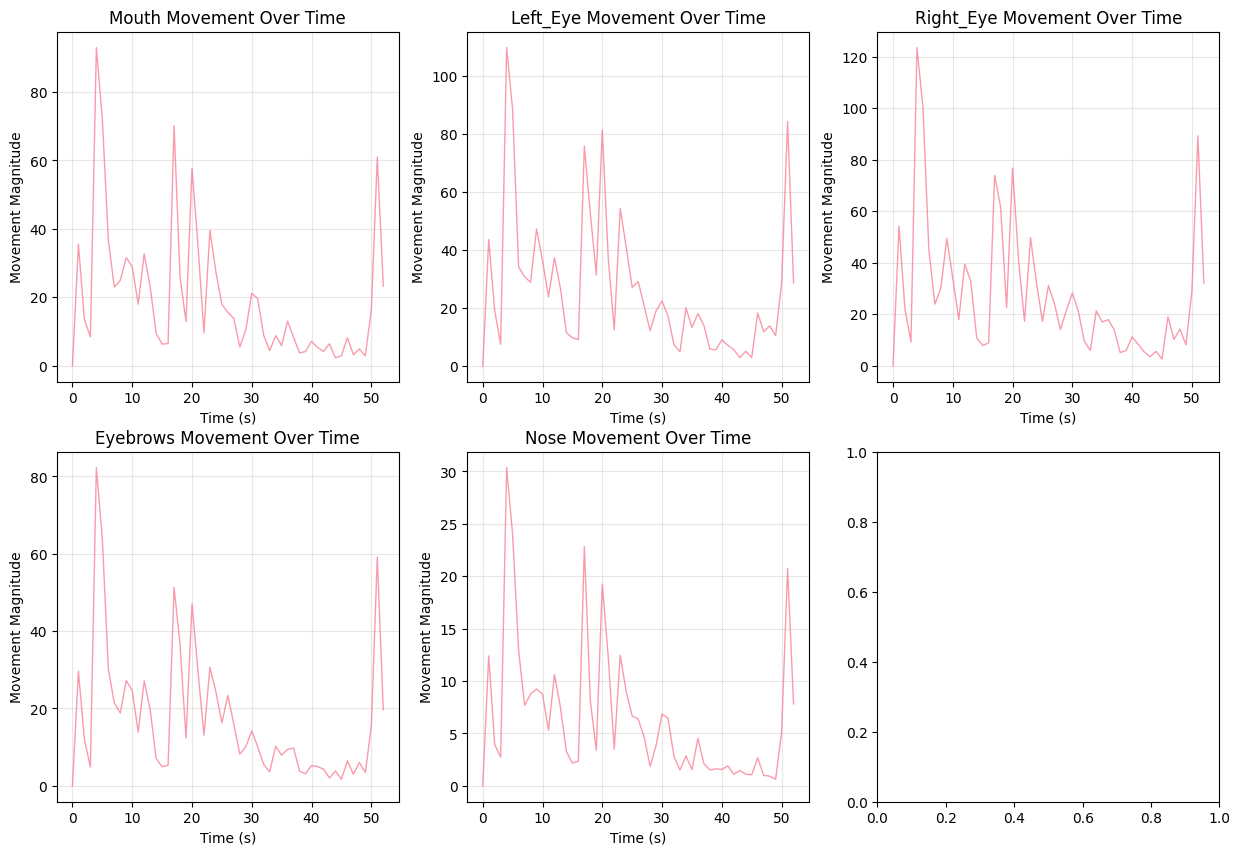

In [13]:
# Plot movement patterns over time
if movement_data and not df_baseline.empty:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    time_values = df_baseline['Time (s)'].values
    
    for i, (region, magnitude) in enumerate(movement_data.items()):
        if i < len(axes):
            axes[i].plot(time_values, magnitude, alpha=0.7, linewidth=1)
            axes[i].set_title(f'{region.title()} Movement Over Time')
            axes[i].set_xlabel('Time (s)')
            axes[i].set_ylabel('Movement Magnitude')
            axes[i].grid(True, alpha=0.3)
    

## Comparison Plot

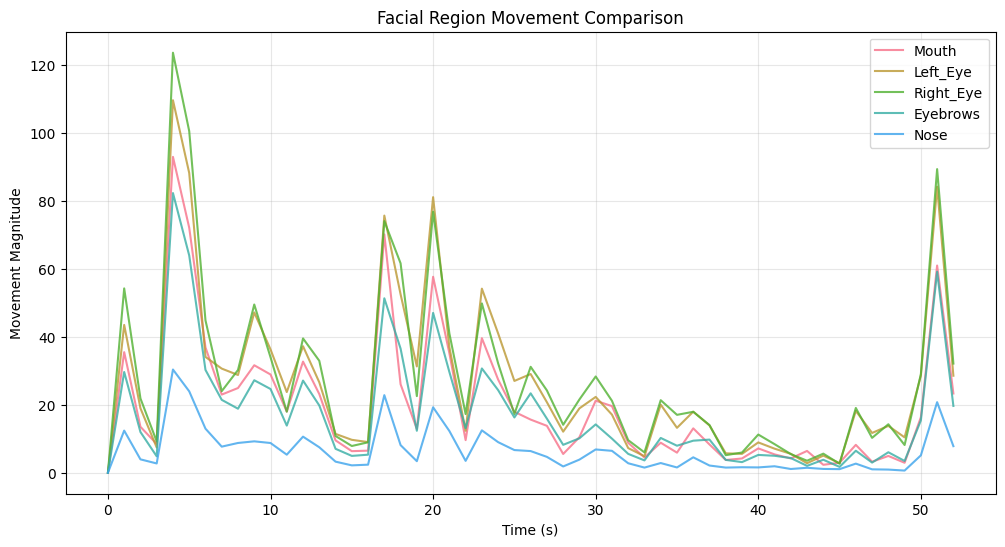

In [14]:

# Create comparison plot
if movement_data and not df_baseline.empty:
    plt.figure(figsize=(12, 6))
    time_values = df_baseline['Time (s)'].values
    
    for region, magnitude in movement_data.items():
        plt.plot(time_values, magnitude, label=region.title(), alpha=0.8)
    
    plt.title('Facial Region Movement Comparison')
    plt.xlabel('Time (s)')
    plt.ylabel('Movement Magnitude')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Movement Statistics Summary

In [15]:
if movement_data:
    summary_stats = []
    
    for region, magnitude in movement_data.items():
        stats = {
            'Region': region.title(),
            'Mean Movement': magnitude.mean(),
            'Std Movement': magnitude.std(),
            'Max Movement': magnitude.max(),
            'Min Movement': magnitude.min(),
            '95th Percentile': np.percentile(magnitude, 95),
            'Movement Variability (CV)': magnitude.std() / magnitude.mean() if magnitude.mean() > 0 else 0
        }
        summary_stats.append(stats)
    
    summary_df = pd.DataFrame(summary_stats)
    summary_df = summary_df.round(4)
    print("Movement Statistics Summary:")
    print(summary_df.to_string(index=False))

Movement Statistics Summary:
   Region  Mean Movement  Std Movement  Max Movement  Min Movement  95th Percentile  Movement Variability (CV)
    Mouth        19.8546       19.9234       92.9409           0.0          64.6367                     1.0035
 Left_Eye        26.6155       24.1677      109.6105           0.0          82.3288                     0.9080
Right_Eye        27.9103       26.0241      123.5980           0.0          81.8254                     0.9324
 Eyebrows        17.4510       17.2371       82.2923           0.0          54.4564                     0.9877
     Nose         6.5108        6.6237       30.3675           0.0          21.5883                     1.0173


# Statistics Heatmap

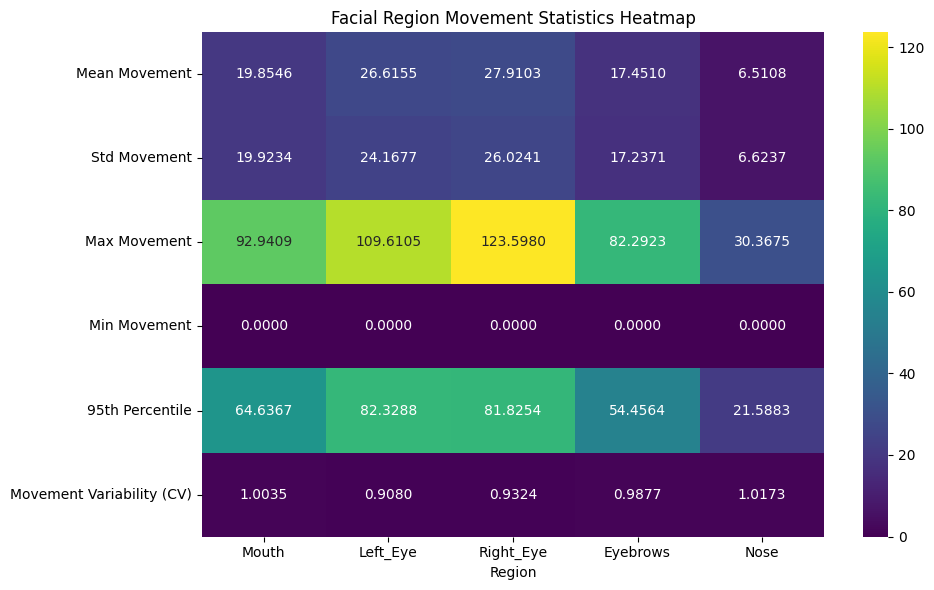

In [16]:
if movement_data:
    numeric_cols = summary_df.select_dtypes(include=[np.number]).columns
    heatmap_data = summary_df[numeric_cols].set_index(summary_df['Region'])
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data.T, annot=True, fmt='.4f', cmap='viridis')
    plt.title('Facial Region Movement Statistics Heatmap')
    plt.tight_layout()
    plt.show()


## Expression Analysis Functions

In [17]:
def analyze_expression_movement(df, expression_name):
    """
    Analyze movement patterns for expression-specific facial regions.
    """
    if expression_name not in EXPRESSION_CLUSTERS:
        print(f"Unknown expression: {expression_name}")
        return None
    
    groups = EXPRESSION_CLUSTERS[expression_name]
    print(f"\n{expression_name.title()} Expression Analysis:")
    print(f"Involves regions: {', '.join(groups)}")
    
    expression_magnitude = np.zeros(len(df))
    total_features = 0
    
    for group in groups:
        landmark_indices = get_group_indices(group)
        
        # Collect features for this group
        feature_cols = []
        for landmark_idx in landmark_indices:
            for axis in ['x', 'y', 'z']:
                col_name = f'feat_{landmark_idx}_{axis}_rb{loader.window_size}_diff'
                if col_name in df.columns:
                    feature_cols.append(col_name)
        
        if feature_cols:
            group_data = df[feature_cols]
            group_magnitude = np.sqrt(np.sum(group_data**2, axis=1))
            expression_magnitude += group_magnitude
            total_features += len(feature_cols)
            
            print(f"  {group}: {len(landmark_indices)} landmarks, {len(feature_cols)} features")
    
    if total_features > 0:
        # Normalize by number of features
        expression_magnitude /= total_features
        
        print(f"  Total features: {total_features}")
        print(f"  Mean movement: {expression_magnitude.mean():.4f}")
        print(f"  Max movement: {expression_magnitude.max():.4f}")
        
        return expression_magnitude
    else:
        print("  No features found for this expression")
        return None

## Analyze All Expressions

In [ ]:
# Analyze all expression types
if not df_baseline.empty:
    expression_movements = {}
    
    for expression in EXPRESSION_CLUSTERS.keys():
        magnitude = analyze_expression_movement(df_baseline, expression)
        if magnitude is not None:
            expression_movements[expression] = magnitude

## Plot Expression Movements

In [ ]:
# Plot expression-specific movements
if expression_movements and not df_baseline.empty:
    plt.figure(figsize=(15, 8))
    
    time_values = df_baseline['Time (s)'].values
    
    for expression, magnitude in expression_movements.items():
        plt.plot(time_values, magnitude, label=expression.title(), alpha=0.8, linewidth=1.5)
    
    plt.title('Expression-Specific Movement Patterns Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized Movement Magnitude')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

## Expression Box Plot

In [ ]:
# Box plot comparison
if expression_movements and not df_baseline.empty:
    plt.figure(figsize=(12, 6))
    expression_data = list(expression_movements.values())
    expression_labels = list(expression_movements.keys())
    
    plt.boxplot(expression_data, labels=[label.title() for label in expression_labels])
    plt.title('Expression Movement Distribution Comparison')
    plt.ylabel('Movement Magnitude')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Machine Learning Data Preparation

In [ ]:
# Demonstrate loading multiple subjects for ML training
print("Preparing data for machine learning...")

# Select first 5 subjects for demo
demo_subjects = available_subjects[:5]
print(f"Demo subjects: {demo_subjects}")

try:
    # Load dataset with train/validation/test split
    dataset = loader.load_dataset(
        subjects=demo_subjects,
        sessions=['baseline'],  # Start with baseline sessions
        test_size=0.2,
        val_size=0.2,
        random_state=42
    )
    
    print(f"\nDataset loaded successfully:")
    print(f"  Train: {len(dataset['train'])} rows")
    print(f"  Validation: {len(dataset['val'])} rows")
    print(f"  Test: {len(dataset['test'])} rows")
    print(f"  Total features: {len(dataset['train'].columns)}")
    
    print(f"\nSubject distribution:")
    print(f"  Train subjects: {dataset['subjects']['train']}")
    print(f"  Val subjects: {dataset['subjects']['val']}")
    print(f"  Test subjects: {dataset['subjects']['test']}")
    
except Exception as e:
    print(f"Error loading dataset: {e}")

## Feature Type Breakdown

In [ ]:
# Show feature types in the dataset
if 'dataset' in locals() and dataset:
    train_df = dataset['train']
    base_features = [col for col in train_df.columns if col.startswith('feat_') and not ('_rb' in col)]
    rb_features = [col for col in train_df.columns if f'_rb{loader.window_size}' in col and not col.endswith('_diff')]
    diff_features = [col for col in train_df.columns if col.endswith(f'_rb{loader.window_size}_diff')]
    
    print(f"\nFeature breakdown:")
    print(f"  Base coordinates: {len(base_features)}")
    print(f"  Rolling baselines: {len(rb_features)}")
    print(f"  Baseline deviations: {len(diff_features)}")

In [ ]:
# Feature selection for specific facial regions
if 'dataset' in locals() and dataset:
    print("\nDemonstrating region-specific feature selection...")
    
    # Select only mouth-related features for training
    mouth_train = loader.select_features(dataset['train'], feature_types=['diff'])
    mouth_indices = get_group_indices('mouth')
    
    # Filter to only mouth landmarks
    mouth_feature_cols = []
    for landmark_idx in mouth_indices:
        for axis in ['x', 'y', 'z']:
            col_name = f'feat_{landmark_idx}_{axis}_rb{loader.window_size}_diff'
            if col_name in mouth_train.columns:
                mouth_feature_cols.append(col_name)
    
    # Add metadata columns
    metadata_cols = ['Subject Name', 'Test Name', 'Time (s)', 'Session']
    mouth_feature_cols.extend([col for col in metadata_cols if col in mouth_train.columns])
    
    mouth_only_data = mouth_train[mouth_feature_cols]
    
    print(f"Mouth-only dataset: {len(mouth_only_data)} rows, {len(mouth_only_data.columns)} columns")
    print(f"Mouth landmarks: {len(mouth_indices)}")
    print(f"Mouth features: {len([col for col in mouth_feature_cols if col.startswith('feat_')])}")

## Summary

In [ ]:
print("🎯 Facemesh Data Analysis Summary")
print("="*50)

if not df_baseline.empty:
    print(f"✓ Successfully loaded sample data: {len(df_baseline)} rows")
    if 'movement_data' in locals():
        print(f"✓ Analyzed {len(movement_data)} facial regions")
    if 'expression_movements' in locals():
        print(f"✓ Examined {len(expression_movements)} expression patterns")

print(f"✓ Available subjects: {len(available_subjects)}")
print(f"✓ Facial clusters defined: {len(FACIAL_CLUSTERS)}")
print(f"✓ Cluster groups available: {len(CLUSTER_GROUPS)}")
print(f"✓ Expression patterns: {len(EXPRESSION_CLUSTERS)}")

if 'dataset' in locals() and dataset:
    print(f"✓ ML-ready dataset prepared with train/val/test splits")

print("\n🚀 Next Steps:")
print("1. Experiment with different window sizes (rb5 vs rb10)")
print("2. Compare baseline vs session data for movement analysis")
print("3. Build machine learning models for specific expressions")
print("4. Analyze temporal sequences with prepare_sequences()")
print("5. Explore cross-subject movement pattern variations")
print("6. Investigate correlation between facial regions")

print("\n📊 Available Analysis Functions:")
print("- get_cluster_features(): Extract features for specific landmarks")
print("- analyze_region_movement(): Analyze movement in facial regions")
print("- analyze_expression_movement(): Expression-specific analysis")
print("- loader.prepare_sequences(): Create temporal sequences for RNNs")
print("- loader.select_features(): Filter by feature types (base/rb/diff)") 